<a href="https://colab.research.google.com/github/lidgarbar/Breast-Cancer-Model-Prediction/blob/main/ModelNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction Model 
> Authors: Juan Sánchez Moreno and Lidia García Barragán

## Setup and imports

In [4]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib pandas scikit-learn tqdm

In [5]:
import os
import tensorflow as tf
from PIL import Image
import pandas as pd
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.utils import load_img , img_to_array
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_dir='data'
dir_benign=os.path.join(data_dir,'benign')
dir_malignant=os.path.join(data_dir,'malignant')
dir_normal=os.path.join(data_dir,'normal')

size_benign=437
size_malignant=209
size_normal=132

def cargaX(tipo,dir_tipo,tamaño):
    images = []
    for i in range(tamaño):
        dir= tipo+' ('+str(i+1)+').png'
        img = load_img(os.path.join(dir_tipo,dir))
        img= img.resize((332, 332))
        img = img_to_array(img)
        img = img/255
        images.append(img)
    X_benign = np.array(images)
    return X_benign


In [7]:
X_benign = cargaX('benign',dir_benign,size_benign)
X_malignant=cargaX('malignant',dir_malignant,size_malignant)
X_normal=cargaX('normal',dir_normal,size_normal)

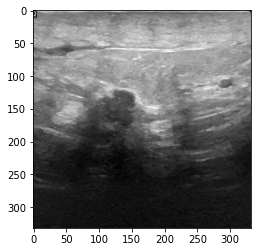

In [8]:
plt.imshow(X_malignant[8])

In [9]:

def cargaImagenes(tipo,dir_tipo,tamaño,lista):
    images_B=[]

    for i in range(tamaño):
        inputImages_B = []
        inputImages_B.append(lista[i])
        dir= tipo+' ('+str(i+1)+')_mask.png'
        dir1=tipo+' ('+str(i+1)+')_mask_1.png'
        

        img = load_img(os.path.join(dir_tipo,dir))
        img= img.resize((332, 332))
        img = img_to_array(img)
        img = img/255
        inputImages_B.append(img)

        outputImage_B=np.concatenate((inputImages_B[0],inputImages_B[1]),axis=1)

    
        images_B.append(outputImage_B)
        if(os.path.exists(os.path.join(dir_tipo,dir1))) :
            img1 = load_img(os.path.join(dir_tipo,dir1))
            img1= img1.resize((332, 332))
            img1 = img_to_array(img1)
            img1 = img1/255
            inputImages_B[1]=img1
            outputImage_B1=np.concatenate((inputImages_B[0],inputImages_B[1]),axis=1)
            images_B.append(outputImage_B1)
        



    images_B=np.array(images_B)
    return images_B

In [10]:
images_B=cargaImagenes('benign',dir_benign,size_benign,X_benign)
images_M=cargaImagenes('malignant',dir_malignant,size_malignant,X_malignant)
images_N=cargaImagenes('normal',dir_normal,size_normal,X_normal)



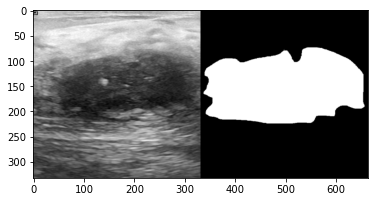

In [11]:
plt.imshow(images_M[0])

Ahora toca hacer una lista (uniendo las tres anteriores) de tuplas de dos elementos: el primero corresponde a la imagen y el segundo corresponde al tipo de tumor (maligno=M, benigno=B, normal=N)

In [23]:
typesAll=[]
imagesAll=[]
def addAll(tipo,lista):
    for i in lista:
        typesAll.append(tipo)
        imagesAll.append(i)

addAll('B',images_B)
addAll('M',images_M)
addAll('N',images_N)



N


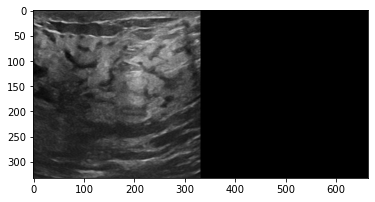

In [22]:
print(typesAll[688])
plt.imshow(imagesAll[688])